In [1]:
import torch
import math

In [2]:
print(math.tanh(-2.2)) #Garbage truck
print(math.tanh(.1)) #Bear
print(math.tanh(2.5)) #Good doggo

-0.9757431300314515
0.09966799462495582
0.9866142981514303


In [3]:
import torch.nn as nn
import torch.optim as optim

Using __call__ rather than forward

In [4]:
#. __call__

# y = model(x) # correct
# y = model.forward(x) # Silent error. Don’t do it!

In [5]:
linear_model = nn.Linear(1, 2)
input = torch.randn(2, 1)
output = linear_model(input)
print(output.size())

torch.Size([2, 2])


In [6]:
# 6.2.2 linear model
# nn.Linear accepts three arguments: the number of input features, the number of output features, and whether the linear
# model includes a bias or not (defaulting to True, here):


linear_model = nn.Linear(1, 1) #y = xA^T + b

t_un_val = torch.randn(2,1)
linear_model(t_un_val)

tensor([[0.6475],
        [0.2938]], grad_fn=<AddmmBackward>)

In [7]:
linear_model.weight

Parameter containing:
tensor([[-0.4194]], requires_grad=True)

In [8]:
linear_model.bias

Parameter containing:
tensor([0.4072], requires_grad=True)

In [9]:
x = torch.ones(1)
linear_model(x)

tensor([-0.0122], grad_fn=<AddBackward0>)

In [10]:
# BATCHING INPUTS
# create an input tensor of size B × Nin, 
# where B is the size of the batch and Nin is the number of input features

x = torch.ones(10,1)
linear_model(x)

tensor([[-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122],
        [-0.0122]], grad_fn=<AddmmBackward>)

In [11]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)  # Adds the extra dimension at axis 1,在索引1添加额外的维度将输入变换
t_u = torch.tensor(t_u).unsqueeze(1)

print(t_u.shape)
t_u

torch.Size([11, 1])


tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [12]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]

val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 2,  4,  1,  9, 10,  6,  5,  3,  7]), tensor([0, 8]))

In [29]:
# 训练集
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
# 验证集
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
#输入标准化处理
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [14]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),
                    lr = 1e-2)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x7fecc592d950>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2980]], requires_grad=True),
 Parameter containing:
 tensor([-0.4655], requires_grad=True)]

In [17]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,t_c_train, t_c_val):
    
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train) 
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad() 
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            

In [18]:
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un,
    t_u_val = val_t_un,
    t_c_train = train_t_c,
    t_c_val = val_t_c)

Epoch 1, Training loss 288.4745, Validation loss 33.3261
Epoch 1000, Training loss 3.0512, Validation loss 12.2290
Epoch 2000, Training loss 2.3325, Validation loss 8.1140
Epoch 3000, Training loss 2.3088, Validation loss 7.4819


In [19]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.1940]], requires_grad=True)
Parameter containing:
tensor([-15.9110], requires_grad=True)


In [20]:
# seq model
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [21]:
[param.shape for param in seq_model.parameters()]# 检查参数
#  model.parameters() will collect weight and bias from both the first and second linear modules

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
# identify parameters by name，通过名字区分参数，调用named_parameters
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [23]:
from collections import OrderedDict
# 有序字典显示model
seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(1, 8)),#隐藏层linear
            ('hidden_activation', nn.Tanh()),#隐藏层激活函数tanh
            ('output_linear', nn.Linear(8, 1))#输出层linear
            ]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [24]:
# 查看更多子模型的解释信息
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [25]:
# 查看具体一层的参数值
seq_model.output_linear.bias

Parameter containing:
tensor([0.0115], requires_grad=True)

In [31]:
# 训练集
train_t_u2 = t_u[train_indices]
train_t_c2 = t_c[train_indices]
# 验证集
val_t_u2 = t_u[val_indices]
val_t_c2 = t_c[val_indices]
#输入标准化处理
train_t_un2 = 0.1 * train_t_u
val_t_un2 = 0.1 * val_t_u

In [33]:
# 在最终轮之后查看的梯度结果
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un2,
    t_u_val = val_t_un2,
    t_c_train = train_t_c2,
    t_c_val = val_t_c2)

print('output', seq_model(val_t_un2))
print('answer', val_t_c2)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.3256, Validation loss 7.5195
Epoch 1000, Training loss 1.3233, Validation loss 7.7459
Epoch 2000, Training loss 1.3217, Validation loss 7.6932
Epoch 3000, Training loss 1.3211, Validation loss 7.6563
Epoch 4000, Training loss 1.3208, Validation loss 7.6478
Epoch 5000, Training loss 1.3205, Validation loss 7.6438
output tensor([[3.5796],
        [8.4091]], grad_fn=<AddmmBackward>)
answer tensor([[0.5000],
        [6.0000]])
hidden tensor([[-0.0009],
        [ 0.0056],
        [ 0.0002],
        [-0.0022],
        [-0.0040],
        [-0.0009],
        [-0.0031],
        [-0.0051]])


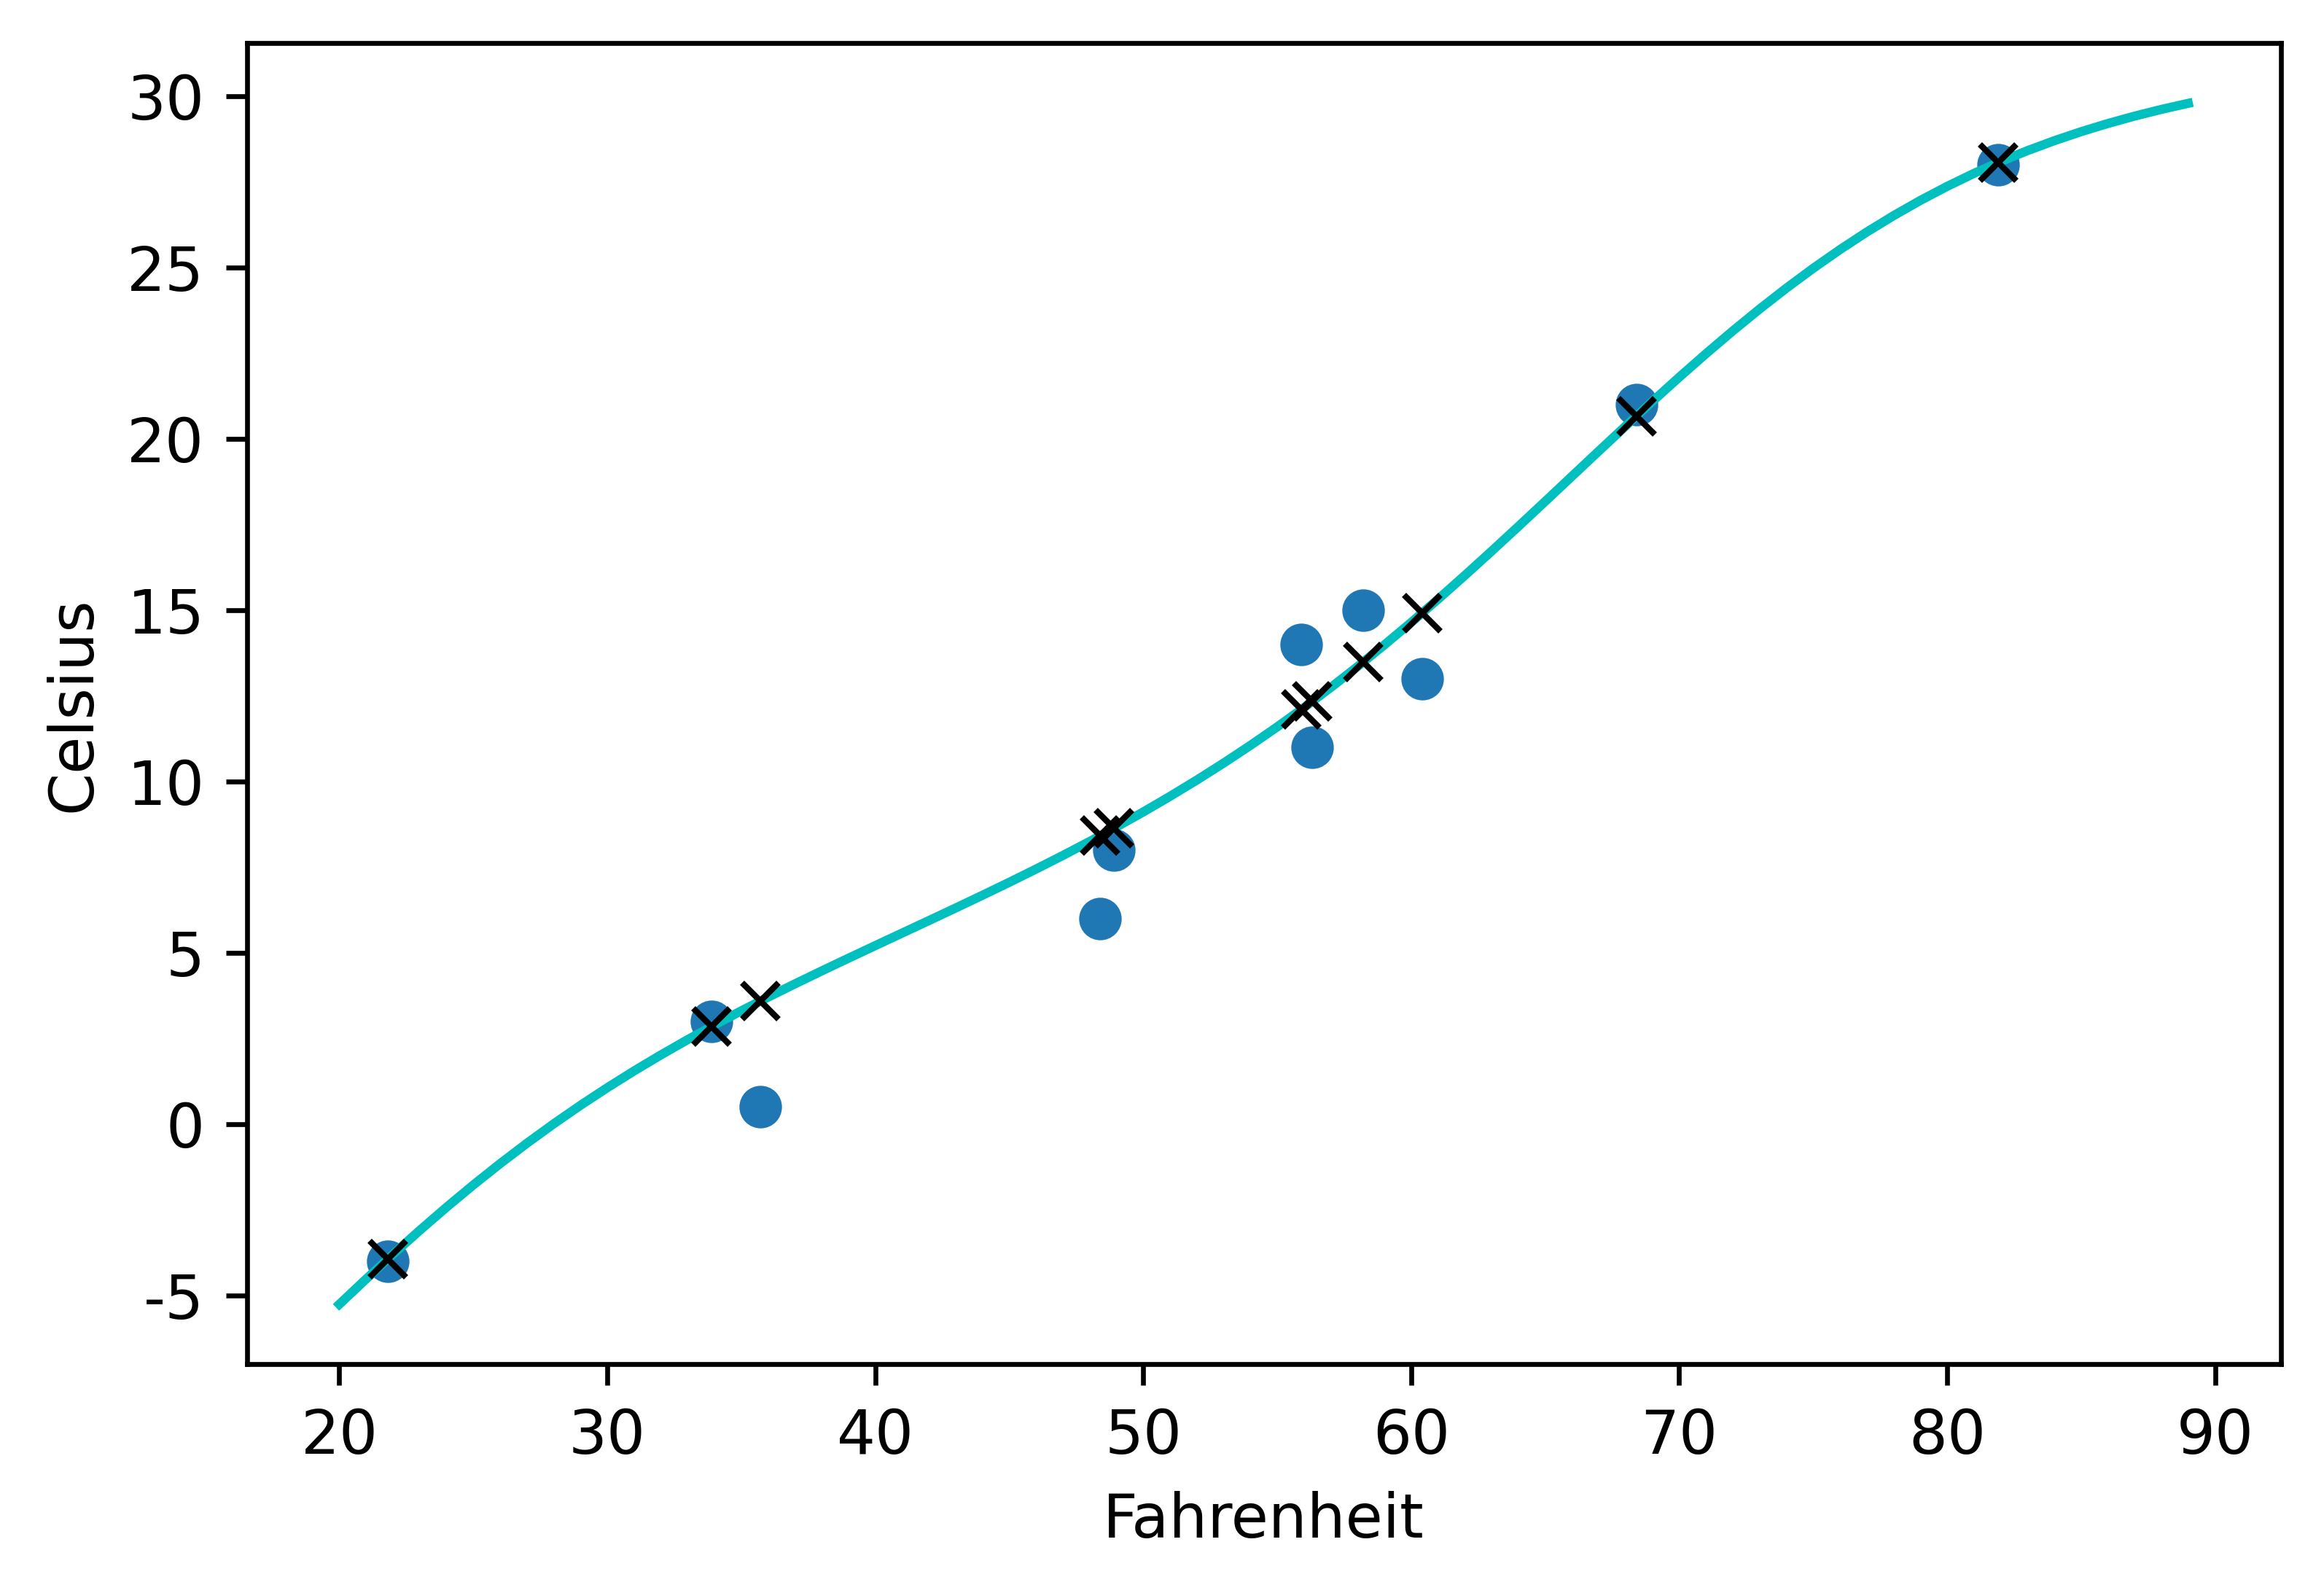

In [34]:
# 6.3.3 和线性模型比较
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')